Please know that this program is using the best fit algorithm.
How big should the memory be in megabytes? 10
How many processes are there? 3
What is the size of process 1? 3
How many time units should be alloted for for process 1? 4
What is the size of process 2? 4
How many time units should be alloted for for process 2? 5
What is the size of process 3? 2
How many time units should be alloted for for process 3? 3
How much time should be alloted for compaction (SC)? 2
How much time should be alloted for coalescing holes (CH)? 1
Time unit: 0


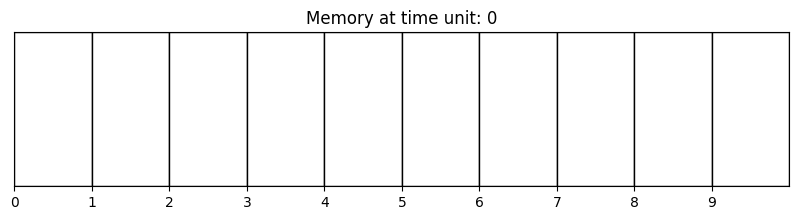

Time unit: 1


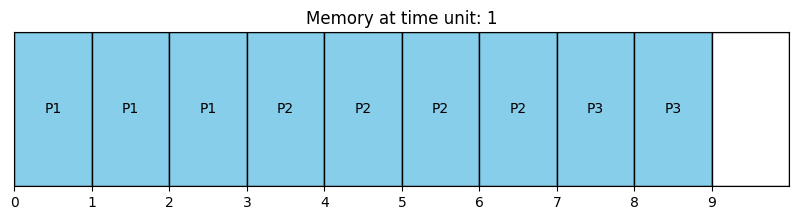

Time unit: 2


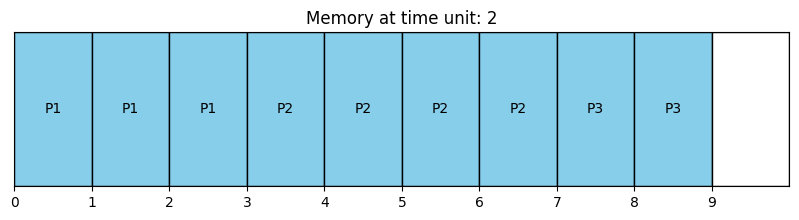

Time unit: 3


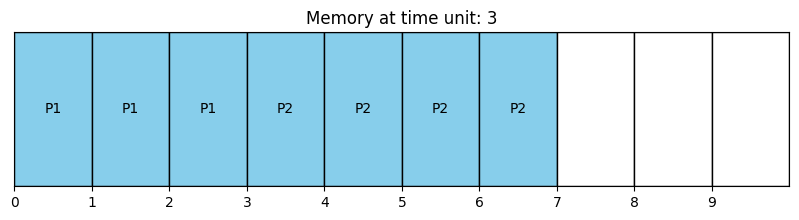

Time unit: 4


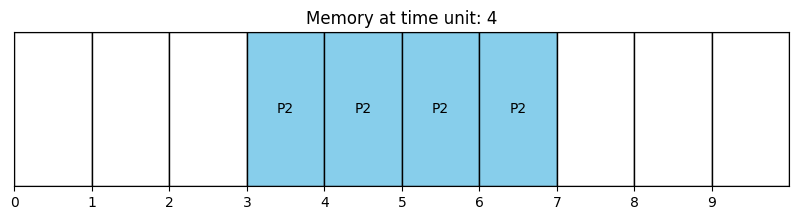

Simulation completed.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

class Process:
    def __init__(self, pid, size, timeUnits):
        self.pid = pid
        self.size = size
        self.timeUnits = timeUnits
        self.startTime = None
        self.endTime = None

class Memory:
    def __init__(self, size):
        self.size = size
        self.memory = [None] * size
        self.time = 0
        self.compactionTime = 0
        self.coalescingTime = 0
        self.freeMemory = size

    def allocateBestFit(self, process):
        bestStart = -1
        bestSize = self.size + 1

        freeSpace = 0
        startIndex = 0
        for i in range(self.size):
            if self.memory[i] is None:
                if freeSpace == 0:
                    startIndex = i
                freeSpace += 1
            if self.memory[i] is not None or i == self.size - 1:
                if freeSpace >= process.size and freeSpace < bestSize:
                    bestStart = startIndex
                    bestSize = freeSpace
                freeSpace = 0

        if bestStart != -1:
            for j in range(bestStart, bestStart + process.size):
                self.memory[j] = process.pid
            process.startTime = self.time
            process.endTime = self.time + process.timeUnits
            self.freeMemory -= process.size
            return True
        return False

    def compactMemory(self):
        self.compactionTime += 1
        print(f"Compaction performed at time unit {self.time}, additional time: {self.compactionTime}")
        compactedMemory = [pid for pid in self.memory if pid is not None]
        self.memory = compactedMemory + [None] * (self.size - len(compactedMemory))
        self.visualizeMemory()

    def freeCompletedProcesses(self, processes):
        for i in range(self.size):
            if self.memory[i] is not None and self.time >= processes[self.memory[i] - 1].endTime:
                self.memory[i] = None
                self.freeMemory += 1

    def visualizeMemory(self):
        fig, ax = plt.subplots(figsize=(10, 2))
        for i, pid in enumerate(self.memory):
            color = "white" if pid is None else "skyblue"
            rect = mpatches.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor="black")
            ax.add_patch(rect)
            if pid is not None:
                ax.text(i + 0.5, 0.5, f'P{pid}', ha='center', va='center')
        ax.set_xlim(0, self.size)
        ax.set_ylim(0, 1)
        ax.set_xticks(range(self.size))
        ax.set_yticks([])
        ax.set_title(f"Memory at time unit: {self.time}")
        plt.show()

    def runSimulation(self, processes, sc, ch):
        while any(p.endTime is None or self.time < p.endTime for p in processes):
            print(f"Time unit: {self.time}")
            self.freeCompletedProcesses(processes)
            self.visualizeMemory()

            for process in processes:
                if process.startTime is None:
                    if not self.allocateBestFit(process):
                        print(f"Process {process.pid} couldn't fit. Coalescing holes...")
                        self.coalescingTime += ch
                        self.compactMemory()
                        if not self.allocateBestFit(process):
                            print(f"After compaction, process {process.pid} still couldn't fit.")
                            break
            self.time += 1

        print("Simulation completed.")

print("Please know that this program is using the best fit algorithm.")
memorySize = int(input("How big should the memory be in megabytes? "))
numProcesses = int(input("How many processes are there? "))
processes = []

for i in range(numProcesses):
    processSize = int(input(f"What is the size of process {i+1}? "))
    timeUnits = int(input(f"How many time units should be alloted for for process {i+1}? "))
    processes.append(Process(i+1, processSize, timeUnits))

sc = int(input("How much time should be alloted for compaction (SC)? "))
ch = int(input("How much time should be alloted for coalescing holes (CH)? "))

memory = Memory(memorySize)
memory.runSimulation(processes, sc, ch)
